In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = 'C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5'

In [ ]:
# Inputs:

age_data_list = []
mass_data_list = []
FeHini_data_list = []
alphaMLT_data_list = []
yini_data_list = []
eta_data_list = []
alphaFe_data_list = []

# Outputs:

Teff_data_list = []
LPhot_data_list = []
FeH_data_list = []
Gaia_data_list = []
massfin_data_list = []
numax_data_list = []
MeH_data_list = []



with h5py.File(file_path, 'r') as f:
    grid = f['grid']
    tracks = grid['tracks']
    
    selected_tracks = []
    
    
    for track_name in tracks:
        track = tracks[track_name]

        # Check if 'massini' dataset exists and is not empty
        if 'massini' in track and track['massini'].size > 0:
            massini_value = track['massini'][()][0]  # Get the first element if it exists
        else:
            massini_value = 0  # Put outside of our desired range so it isn't selected

        # Check if 'alphaMLT' dataset exists and is not empty
        if 'alphaMLT' in track and track['alphaMLT'].size > 0:
            alphaMLT_value = track['alphaMLT'][()][0]  # Get the first element if it exists
        else:
            alphaMLT_value = 0  # Put outside of our desired range so it isn't selected

        if massini_value == 1.1:
            selected_tracks.append(track)
            # Access and collect the data for each track:

            # Inputs:

            age_data = track['age'][:]
            mass_data = track['massini'][:] 
            FeHini_data = track['FeHini'][:]
            alphaMLT_data = track['alphaMLT'][:]
            yini_data = track['yini'][:]
            eta_data = track['eta'][:]
            alphaFe_data = track['alphaFe'][:]
            
            # Outputs:

            teff_data = track['Teff'][:] 
            luminosity_data = track['LPhot'][:] 
            FeH_data = track['FeH'][:]
            Gaia_data = track['G_GAIA'][:]
            massfin_data = track['massfin'][:]
            numax_data = track['numax'][:]
            MeH_data = track['MeH'][:]

            # Append to lists:

            # Inputs:

            age_data_list.append(age_data)
            mass_data_list.append(mass_data)
            FeHini_data_list.append(FeHini_data)
            alphaMLT_data_list.append(alphaMLT_data)
            yini_data_list.append(yini_data)
            eta_data_list.append(eta_data)
            alphaFe_data_list.append(alphaFe_data)

            # Outputs: 

            Teff_data_list.append(teff_data)
            LPhot_data_list.append(luminosity_data)
            FeH_data_list.append(FeH_data)
            Gaia_data_list.append(Gaia_data)
            massfin_data_list.append(massfin_data)
            numax_data_list.append(numax_data)
            MeH_data_list.append(MeH_data)

print(f"Total selected tracks: {len(selected_tracks)}")

track00001
track01364
track02046
track02731
track04094
track04097
track04779
track05460
track06145
track06827
track08190
track08193
track09556
Total selected tracks: 13


In [43]:
track_number1 = "00001"

with h5py.File(file_path, 'r') as f:
    path_temp1 = f"grid/tracks/track{track_number1}/Teff"
    path_lum1 = f"grid/tracks/track{track_number1}/LPhot"
    path_age1 = f"grid/tracks/track{track_number1}/age"
    path_mass1 = f"grid/tracks/track{track_number1}/massini"
    path_FeH = f"grid/tracks/track{track_number1}/FeH"
    path_Gaia = f"grid/tracks/track{track_number1}/G_GAIA"
    path_FeHini = f"grid/tracks/track{track_number1}/FeHini"
    path_alphaMLT = f"grid/tracks/track{track_number1}/alphaMLT"
    path_yini = f"grid/tracks/track{track_number1}/yini"
    path_eta = f"grid/tracks/track{track_number1}/eta"
    path_alphaFe = f"grid/tracks/track{track_number1}/alphaFe"
    path_massfin = f"grid/tracks/track{track_number1}/massfin"
    path_numax = f"grid/tracks/track{track_number1}/numax"
    path_MeH = f"grid/tracks/track{track_number1}/MeH"
    
    # Inputs:

    age1 = f[path_age1][:]
    mass1 = f[path_mass1][:]
    FeHini1 = f[path_FeHini][:]
    alphaMLT1 = f[path_alphaMLT][:]
    yini1 = f[path_yini][:]
    eta1 = f[path_eta][:]
    alphaFe1 = f[path_alphaFe][:]

    # Outputs:

    Teff1 = f[path_temp1][:]
    LPhot1 = f[path_lum1][:]
    massfin1 = f[path_massfin][:]
    numax1 = f[path_numax][:]
    MeH1 = f[path_MeH][:]
    FeH1 = f[path_FeH][:]
    Gaia1 = f[path_Gaia][:]

#inputs = np.column_stack((age1, mass1, FeHini1, alphaMLT1, yini1, eta1, alphaFe1))
#outputs = np.column_stack((Teff1, LPhot1, FeH1, Gaia1, numax1, MeH1, massfin1))


In [44]:
# Attempting with 13 tracks collected:

X_scaler = StandardScaler()
Y_scaler = StandardScaler()

# Inputs:
age_data_scaled = np.concatenate(age_data_list).reshape(-1, 1)
mass_data_scaled = np.concatenate(mass_data_list).reshape(-1, 1)
FeHini_data_scaled = np.concatenate(FeHini_data_list).reshape(-1, 1)
alphaMLT_data_scaled = np.concatenate(alphaMLT_data_list).reshape(-1, 1)
yini_data_scaled = np.concatenate(yini_data_list).reshape(-1, 1)
eta_data_scaled = np.concatenate(eta_data_list).reshape(-1, 1)
alphaFe_data_scaled = np.concatenate(alphaFe_data_list).reshape(-1, 1)

# Outputs:

Teff_data_scaled = np.concatenate(Teff_data_list).reshape(-1, 1)
LPhot_data_scaled = np.concatenate(LPhot_data_list).reshape(-1, 1)
FeH_data_scaled = np.concatenate(FeH_data_list).reshape(-1, 1)
Gaia_data_scaled = np.concatenate(Gaia_data_list).reshape(-1, 1)
massfin_data_scaled = np.concatenate(massfin_data_list).reshape(-1, 1)
numax_data_scaled = np.concatenate(numax_data_list).reshape(-1, 1)
MeH_data_scaled = np.concatenate(MeH_data_list).reshape(-1, 1)


inputs = np.column_stack((age_data_scaled, mass_data_scaled, FeHini_data_scaled, alphaMLT_data_scaled, yini_data_scaled, eta_data_scaled, alphaFe_data_scaled))
outputs = np.column_stack((Teff_data_scaled, LPhot_data_scaled, FeH_data_scaled, Gaia_data_scaled, massfin_data_scaled, numax_data_scaled, MeH_data_scaled))

X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=1)

X_train = torch.FloatTensor(X_scaler.fit_transform(X_train)).view(-1, 7)
X_test = torch.FloatTensor(X_scaler.transform(X_test)).view(-1, 7)
Y_train = torch.FloatTensor(Y_scaler.fit_transform(Y_train))
Y_test = torch.FloatTensor(Y_scaler.transform(Y_test))

Epoch [1000/10000], Train Loss: 0.0586, Test Loss: 0.0604
Epoch [2000/10000], Train Loss: 0.0145, Test Loss: 0.0147
Epoch [3000/10000], Train Loss: 0.0063, Test Loss: 0.0064
Epoch [4000/10000], Train Loss: 0.0041, Test Loss: 0.0041
Epoch [5000/10000], Train Loss: 0.0038, Test Loss: 0.0041
Epoch [6000/10000], Train Loss: 0.0027, Test Loss: 0.0027
Epoch [7000/10000], Train Loss: 0.0024, Test Loss: 0.0024
Epoch [8000/10000], Train Loss: 0.0021, Test Loss: 0.0021
Epoch [9000/10000], Train Loss: 0.0019, Test Loss: 0.0019
Epoch [10000/10000], Train Loss: 0.0018, Test Loss: 0.0017


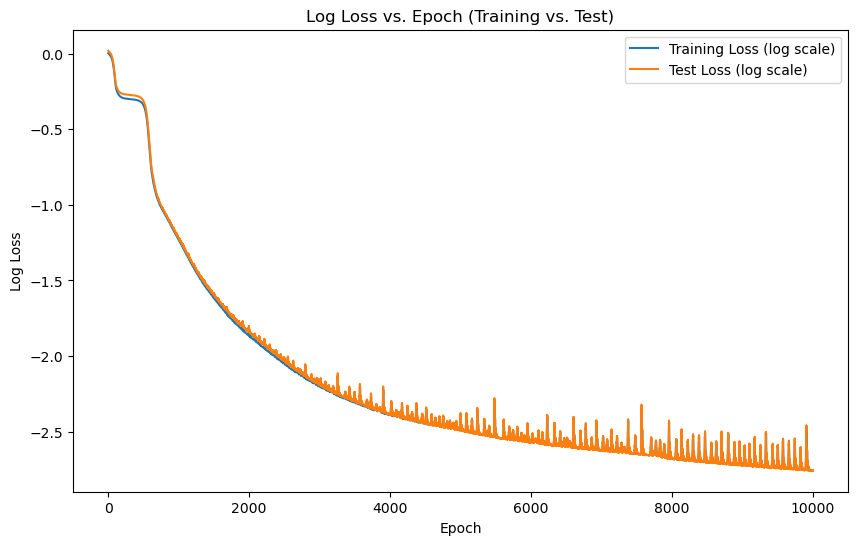

In [45]:
# Define a simple neural network model
class StellarModel(nn.Module):
    def __init__(self):
        super(StellarModel, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 7)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate the model, define loss and optimizer
model = StellarModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 10000
train_loss = []  
test_loss = []   

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass for training data
    outputs_train = model(X_train)
    epoch_train_loss = criterion(outputs_train, Y_train)

    # Backward pass and optimization for training data
    optimizer.zero_grad()  # Clear gradients
    epoch_train_loss.backward()  # Backpropagation
    optimizer.step()       # Update weights

    # Forward pass for test data
    model.eval()  # Set the model to evaluation mode (disables dropout, etc.)
    with torch.no_grad():
        outputs_test = model(X_test)
        epoch_test_loss = criterion(outputs_test, Y_test)  # Calculate test loss
    
    # Store the losses for plotting
    train_loss.append(epoch_train_loss.item())
    test_loss.append(epoch_test_loss.item())

    # Print progress every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss.item():.4f}, Test Loss: {epoch_test_loss.item():.4f}')

# Plot training and test loss
plt.figure(figsize=(10, 6))
plt.plot(np.log10(train_loss), label='Training Loss (log scale)')
plt.plot(np.log10(test_loss), label='Test Loss (log scale)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Epoch (Training vs. Test)')
plt.legend()
plt.show()

In [46]:
model.eval()
with torch.no_grad():
    # Make predictions for both training and test sets
    predictions_train = model(X_train).numpy()
    predictions_train = Y_scaler.inverse_transform(predictions_train)
    y_train_actual = Y_scaler.inverse_transform(Y_train.numpy())

    predictions_test = model(X_test).numpy()
    predictions_test = Y_scaler.inverse_transform(predictions_test)
    y_test_actual = Y_scaler.inverse_transform(Y_test.numpy())

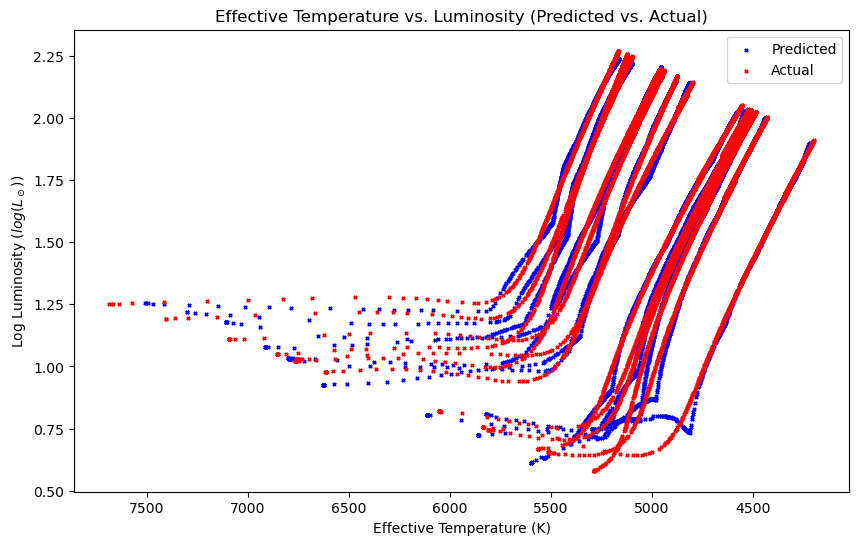

In [47]:
# Now plotting each set of parameters indivdually

# Log luminosity vs effective temperature (HR diagram)

predicted_temperature_train = predictions_train[:, 0]
predicted_luminosity_train = predictions_train[:, 1]
actual_temperature_train = y_train_actual[:, 0]
actual_luminosity_train = y_train_actual[:, 1]

predicted_temperature_test = predictions_test[:, 0]
predicted_luminosity_test = predictions_test[:, 1]
actual_temperature_test = y_test_actual[:, 0]
actual_luminosity_test = y_test_actual[:, 1]

# log luminosity:
Log_Lum_pred = np.log10(predicted_luminosity_train)
Log_Lum_actual = np.log10(actual_luminosity_train)

# Plotting the combined data
plt.figure(figsize=(10, 6))
plt.scatter(predicted_temperature_train, Log_Lum_pred, s=5, color='blue', marker='x', alpha=1, label='Predicted')
plt.scatter(actual_temperature_train, Log_Lum_actual, s=5, color='red', marker='x', alpha=1, label='Actual')
plt.gca().invert_xaxis()
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Log Luminosity ($log(L_\odot$))")
plt.title("Effective Temperature vs. Luminosity (Predicted vs. Actual)")
plt.legend()
plt.show()

In [25]:
# G_Gaia and FeH

predicted_FeH_train = predictions_train[:, 2]
predicted_Gaia_train = predictions_train[:, 3]
actual_FeH_train = y_train_actual[:, 2]
actual_Gaia_train = y_train_actual[:, 3]

predicted_FeH_test = predictions_test[:, 2]
predicted_Gaia_test = predictions_test[:, 3]
actual_FeH_test = y_test_actual[:, 2]
actual_Gaia_test = y_test_actual[:, 3]

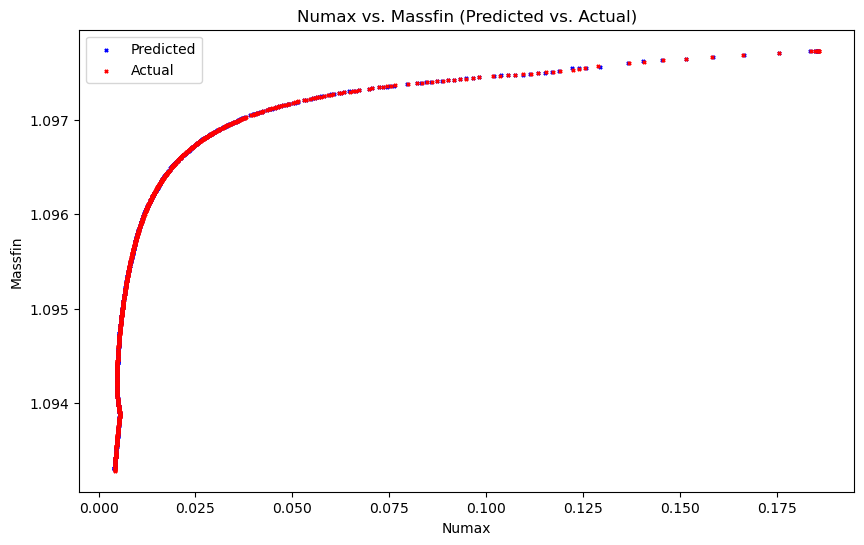

In [30]:
# Teff1, LPhot1, FeH1, Gaia1, numax1, MeH1, massfin1

predicted_numax_train = predictions_train[:, 4]
predicted_MeH_train = predictions_train[:, 5]
predicted_massfin_train = predictions_train[:, 6]
actual_numax_train = y_train_actual[:, 4]
actual_MeH_train = y_train_actual[:, 5]
actual_massfin_train = y_train_actual[:, 6]


predicted_numax_test = predictions_test[:, 4]
predicted_MeH_test = predictions_test[:, 5]
predicted_massfin_test = predictions_test[:, 6]
actual_numax_test = y_test_actual[:, 4]
actual_MeH_test = y_test_actual[:, 5]
actual_massfin_test = y_test_actual[:, 6]

plt.figure(figsize=(10, 6))
plt.scatter(predicted_numax_train, predicted_massfin_train, s=5, color='blue', marker='x', alpha=1, label='Predicted')
plt.scatter(actual_numax_train, actual_massfin_train, s=5, color='red', marker='x', alpha=1, label='Actual')
#plt.gca().invert_xaxis()
plt.xlabel("Numax")
plt.ylabel("Massfin")
plt.title("Numax vs. Massfin (Predicted vs. Actual)")
plt.legend()
plt.show()